In [1]:
import math
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,LSTM
from keras.models import Sequential
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\admin\Downloads\AAPL.csv',index_col='Date')

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-15,128.779999,130.220001,127.000000,127.139999,126.361015,111598500
2021-01-19,127.779999,128.710007,126.940002,127.830002,127.046783,90757300
2021-01-20,128.660004,132.490005,128.550003,132.029999,131.221054,104319500
2021-01-21,133.800003,139.669998,133.589996,136.869995,136.031387,120150900
2021-01-22,136.279999,139.850006,135.020004,139.070007,138.217911,114459400


In [4]:
df.shape

(253, 6)

Text(0, 0.5, 'close price in usd($)')

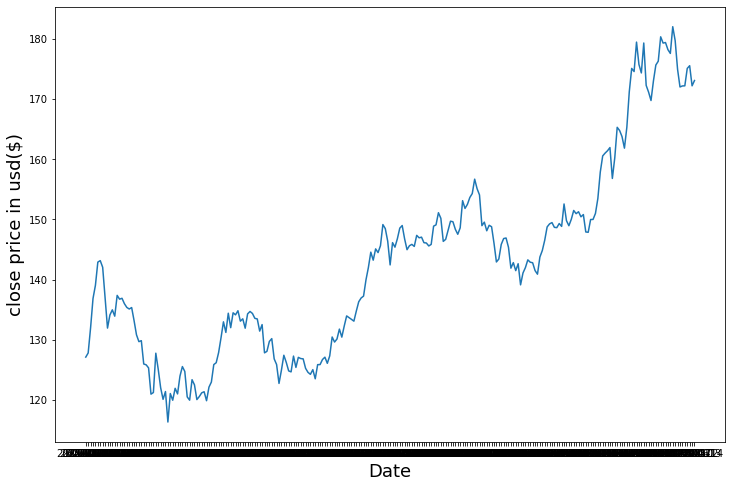

In [5]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price in usd($)',fontsize=18)

In [36]:
data=df.filter(["Close"])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

203

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(dataset)
scaler_data

array([[0.1642041 ],
       [0.17471443],
       [0.23869001],
       [0.31241426],
       [0.34592548],
       [0.40456968],
       [0.40822552],
       [0.39146991],
       [0.31576538],
       [0.23762388],
       [0.27083015],
       [0.2837777 ],
       [0.26778374],
       [0.32033511],
       [0.3107387 ],
       [0.31302368],
       [0.29931448],
       [0.28987052],
       [0.28591022],
       [0.28956581],
       [0.25635952],
       [0.22056354],
       [0.20335121],
       [0.2057882 ],
       [0.1468393 ],
       [0.14470679],
       [0.13693828],
       [0.07052547],
       [0.07463826],
       [0.17410512],
       [0.13343492],
       [0.08682403],
       [0.05742569],
       [0.07707536],
       [0.        ],
       [0.07204867],
       [0.05514093],
       [0.08530082],
       [0.07113478],
       [0.11622236],
       [0.14028941],
       [0.12795128],
       [0.06351863],
       [0.05529318],
       [0.107083  ],
       [0.09413558],
       [0.05681638],
       [0.064

In [8]:
train_data=scaler_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.1642041 , 0.17471443, 0.23869001, 0.31241426, 0.34592548,
       0.40456968, 0.40822552, 0.39146991, 0.31576538, 0.23762388,
       0.27083015, 0.2837777 , 0.26778374, 0.32033511, 0.3107387 ,
       0.31302368, 0.29931448, 0.28987052, 0.28591022, 0.28956581,
       0.25635952, 0.22056354, 0.20335121, 0.2057882 , 0.1468393 ,
       0.14470679, 0.13693828, 0.07052547, 0.07463826, 0.17410512,
       0.13343492, 0.08682403, 0.05742569, 0.07707536, 0.        ,
       0.07204867, 0.05514093, 0.08530082, 0.07113478, 0.11622236,
       0.14028941, 0.12795128, 0.06351863, 0.05529318, 0.107083  ,
       0.09413558, 0.05681638, 0.06443253, 0.07387659, 0.07661841,
       0.05392234, 0.088195  , 0.10114242, 0.1453161 , 0.15003806,
       0.17578069, 0.21325211, 0.25346535, 0.22665659, 0.27524743])]
[0.23869001419863056]



In [9]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [10]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [11]:
x_train.shape

(143, 60, 1)

In [12]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
143/143 [==============================] - 8s 29ms/step - loss: 0.0083
Epoch 2/10
143/143 [==============================] - 4s 26ms/step - loss: 0.0031
Epoch 3/10
143/143 [==============================] - 4s 26ms/step - loss: 0.0029
Epoch 4/10
143/143 [==============================] - 4s 25ms/step - loss: 0.0022
Epoch 5/10
143/143 [==============================] - 4s 26ms/step - loss: 0.0019
Epoch 6/10
143/143 [==============================] - 4s 26ms/step - loss: 0.0016
Epoch 7/10
143/143 [==============================] - 4s 25ms/step - loss: 0.0024
Epoch 8/10
143/143 [==============================] - 4s 25ms/step - loss: 0.0022
Epoch 9/10
143/143 [==============================] - 4s 26ms/step - loss: 0.0017
Epoch 10/10
143/143 [==============================] - 4s 26ms/step - loss: 0.0016


In [15]:
test_data=scaler_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len-60:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [16]:
x_test=np.array(x_test)

In [17]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
prediction=model.predict(x_test)

In [19]:
prediction=scaler.inverse_transform(prediction)

In [20]:
print(prediction)

[[146.5296 ]
 [146.62675]
 [146.77425]
 [146.78375]
 [146.78403]
 [146.30334]
 [145.67508]
 [145.43445]
 [145.43639]
 [145.73346]
 [146.53584]
 [148.07666]
 [150.11224]
 [152.12395]
 [153.8236 ]
 [155.11638]
 [155.1056 ]
 [154.99007]
 [155.50766]
 [156.13127]
 [156.53372]
 [156.42352]
 [156.59177]
 [157.68584]
 [159.5949 ]
 [161.48227]
 [163.73402]
 [165.15085]
 [165.64745]
 [166.29213]
 [165.734  ]
 [164.49374]
 [162.89368]
 [161.94185]
 [161.87242]
 [162.36298]
 [163.67224]
 [165.0058 ]
 [166.14003]
 [166.7842 ]
 [166.96193]
 [167.53079]
 [167.8016 ]
 [167.114  ]
 [165.5911 ]
 [164.00717]
 [162.72076]
 [162.29558]
 [162.46332]
 [162.42001]]


<ipython-input-21-bbce88965578>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


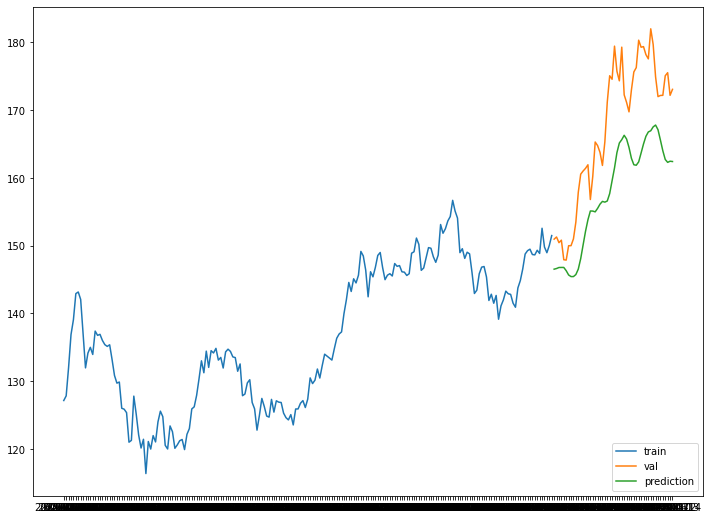

In [21]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction

plt.figure(figsize=(12,9))
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['train','val','prediction'],loc='lower right')

In [22]:
valid

,Close,prediction
Date,,
2021-11-04,150.960007,146.529602
2021-11-05,151.279999,146.626755
2021-11-08,150.440002,146.774246
2021-11-09,150.809998,146.783752
2021-11-10,147.919998,146.784027
2021-11-11,147.869995,146.303345
2021-11-12,149.990005,145.675079
2021-11-15,150.000000,145.434448
2021-11-16,151.000000,145.436386


In [23]:
apple=pd.read_csv(r'C:\Users\admin\Downloads\AAPL.csv')

In [24]:
df=apple.filter(['Close'])

In [25]:
last_60_days=df[-60:].values

In [26]:
last_60_days_scaler=scaler.transform(last_60_days)

In [27]:
x_test=[]

In [28]:
x_test.append(last_60_days_scaler)

In [29]:
x_test=np.array(x_test)

In [30]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [31]:
pred_price=model.predict(x_test)

In [32]:
pred_price=scaler.inverse_transform(pred_price)

In [33]:
print(pred_price)

[[162.47029]]
